<a href="https://colab.research.google.com/github/PhaTanVu/AI_24-02/blob/main/AI_%C4%90i%E1%BB%81ukhi%E1%BB%83n%C4%91%E1%BB%99ngc%C6%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=925fd869eef29280b98e670795a5d2c4aab28829979d970e6bdbfa8f3538edd4
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


<ipython-input-2-69b8848238f0>:54: UserWarning: The following kwargs were not used by contour: 'offet', 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'z', offet = 9, cmap = 'viridis', anpha = 0.5)
<ipython-input-2-69b8848238f0>:55: UserWarning: The following kwargs were not used by contour: 'offet', 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'x', offet = 11, cmap = 'viridis', anpha = 0.5)
<ipython-input-2-69b8848238f0>:56: UserWarning: The following kwargs were not used by contour: 'offet', 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'y', offet = 11, cmap = 'viridis', anpha = 0.5)


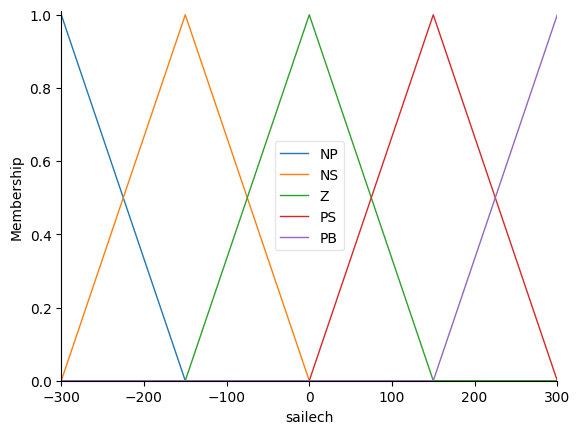

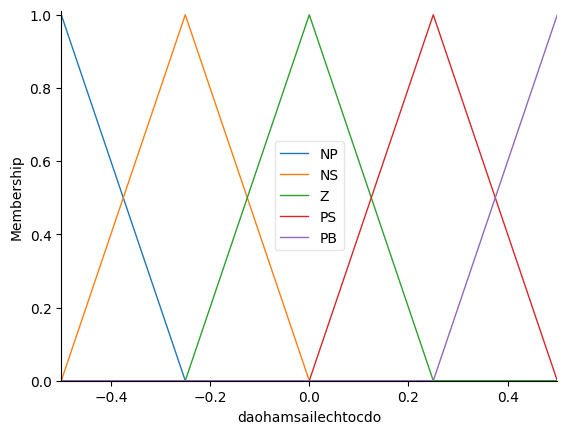

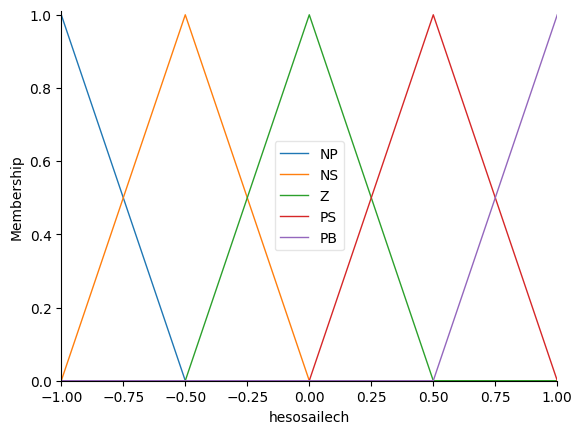

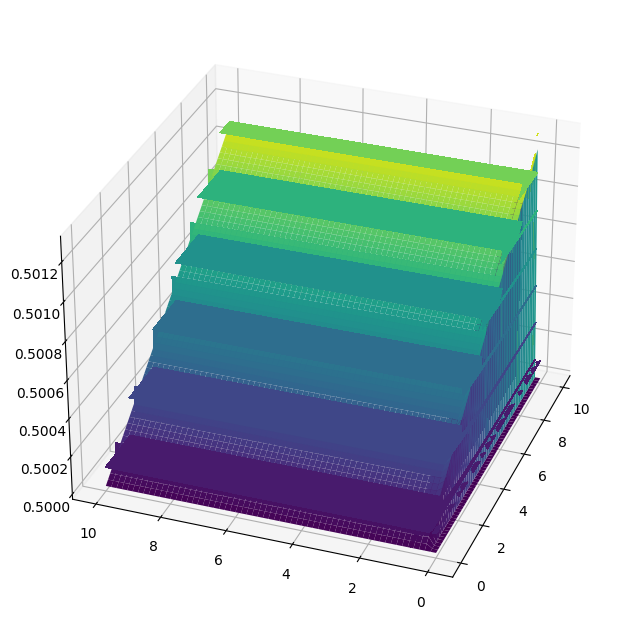

In [2]:
from IPython.utils.process import system
from matplotlib.pyplot import triplot
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

sailech = np.linspace(-300,300,61) # chia khoang 0-10 thanhf 61 phaanf thuw
daohamsailechtocdo= np.linspace(-0.5,0.5,61)
hesosailech= np.linspace(-1,1,61)

sailech= ctrl.Antecedent(sailech,'sailech')
daohamsailechtocdo = ctrl.Antecedent(daohamsailechtocdo,'daohamsailechtocdo')
hesosailech = ctrl.Consequent(hesosailech,'hesosailech')

names = ['NP','NS','Z','PS','PB'] # gia tri phai laf ler 
sailech.automf(names=names) # chia khoan cho tung bieeur ddofo teen dg bieu do
daohamsailechtocdo.automf(names=names)
hesosailech.automf(names=names)

sailech.view()
daohamsailechtocdo.view()
hesosailech.view()

rule0 = ctrl.Rule(antecedent=((sailech['NP']&daohamsailechtocdo['NP'])|(sailech['NP']&daohamsailechtocdo['NS'])|(sailech['NS']&daohamsailechtocdo['NP'])),consequent=hesosailech['NP'], label= 'rule NP') 

rule1 = ctrl.Rule(antecedent=((sailech['NP']&daohamsailechtocdo['Z'])|(sailech['NP']&daohamsailechtocdo['PS'])|(sailech['NS']&daohamsailechtocdo['NS'])|(sailech['NS']&daohamsailechtocdo['Z'])
|(sailech['Z']&daohamsailechtocdo['NP'])|(sailech['Z']&daohamsailechtocdo['NS'])|(sailech['PS']&daohamsailechtocdo['NS'])),consequent=hesosailech['NS'], label= 'rule NS') 

rule2 = ctrl.Rule(antecedent=((sailech['NP']&daohamsailechtocdo['PB'])|(sailech['NS']&daohamsailechtocdo['PS'])|(sailech['PS']&daohamsailechtocdo['NS'])
|(sailech['PB']&daohamsailechtocdo['NP'])),consequent=hesosailech['Z'], label= 'rule Z') 

rule3 = ctrl.Rule(antecedent=((sailech['NS']&daohamsailechtocdo['PB'])|(sailech['Z']&daohamsailechtocdo['Z'])|(sailech['Z']&daohamsailechtocdo['PS'])|(sailech['Z']&daohamsailechtocdo['PB'])
|(sailech['PS']&daohamsailechtocdo['Z'])|(sailech['PS']&daohamsailechtocdo['PS'])|(sailech['PB']&daohamsailechtocdo['NS'])|(sailech['PB']&daohamsailechtocdo['Z'])),consequent=hesosailech['PS'], label= 'rule PS') 

rule4 = ctrl.Rule(antecedent=((sailech['PS']&daohamsailechtocdo['PB'])|(sailech['PB']&daohamsailechtocdo['PS'])|(sailech['PB']&daohamsailechtocdo['PB'])),consequent=hesosailech['PB'], label= 'rule PB') 

system = ctrl.ControlSystem(rules=[rule0,rule1,rule2, rule3, rule4])
sim = ctrl.ControlSystemSimulation(system, flush_after_run= 61*61+1)
upsampled = np.linspace(00,10,61)
x,y = np.meshgrid(upsampled,upsampled)
z= np.zeros_like(x)
for i in range(61):
  for j in range(61):
    sim.input['sailech'] = x[i,j]
    sim.input['daohamsailechtocdo'] = y[i,j]
    sim.compute()
    z[i,j] = sim.output['hesosailech']
#phaanf hien thi
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection = '3d') #vị trí tọa độ 1 1 1
suf = ax.plot_surface(x, y, z, rstride = 1, cstride = 1, cmap = 'viridis',
linewidth = 0.4, antialiased = True)
cset = ax.contourf(x, y, z, zdir = 'z', offet = 9, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'x', offet = 11, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'y', offet = 11, cmap = 'viridis', anpha = 0.5)
ax.view_init(30,200)